# Ideen fürs Invertieren 

Problem: Für das berechnen der Strahlen braucht man die inverse Verzeichnungsfunktion (**Ent**zerrung $g(\overrightarrow{x})$). Als Eingabe haben wir (jedenfalls aus der LensFun-Datenbank) die **Ver**zerrung $f(\overrightarrow{x})$ als modellierte Funktion. Wenn man die Modelle, die die verwenden, z.B. das `Poly3` ($r_d = r_u (1 - k + k *r_u^2)$) mal von z.B. WolframAlpha invertieren lässt, kommt sowas heraus: 

![Eskalation](inversion_wolfram.jpg)

Andere Online-Tools bringen andere Ergebnisse, die aber ähnlich bescheuert aussehen. Direkt invertieren ist also eher Käse und wahrscheinlich auch nicht der Sinn der Aufgabe (Epiphanie hier), eher würde das Ganze so ablaufen:

- Als Eingabe bekommt die Kamera eine (irgendwie) _gemessene Verzeichnung_ (zum Beispiel in Form einer Funktion, die auf die gemessenen Pixelverschiebungen gefittet wurde, oder die gemessenen Verzeichnungen als Matrix für soundsoviele Punkte im Bild, oder...)
- In der `DistortionCamera` ist ein Modell (oder mehrere) zur Entzerrung implementiert. Das Modell wird dann auf die inverse (also quasi negierte) gemessenen Verzeichnung gefittet, die der User als Eingabe mitgegeben hat. Und daraus ergibt sich dann eine Funktion, die (hoffentlich) die gemessene Verzerrung ausreichend korrekt rückgängig macht. In Mathe: 
    - Eingabe als Modell $r_d = f(x,y) = r_u(1 - k + k r_u^2)$ mit $ r_u = \sqrt{(x -x_c)^2 + (y-y_c)^2}$
    - Ein Pixel $(x_1,y_1)$ wird dann auf $(x_2,y_2) = (x_1,y_1) + (r_d - r_u) \cdot \overrightarrow{e_r}$ geschoben
    - Entzerrt werden kann dann der Pixel $(x_2,y_2)$, indem $r_d - r_u$ abgezogen wird
    - Man könnte also die eingegebene Verzerrung für verschiedene Punkte $(x_1, y_1)$ abrastern und für die verschobenen Punkte $(x_2, y_2)$ die inverse Verschiebung (bzw. als Faktor) abspeichern und dann darauf das Entzerrungsmodell fitten
    
# Lensfun Invertierung

Die Lensfun Library kann Bilder entzerren, abgespeichert wird bei denen die gemessene **Ver**zerrung. Nirgendwo steht die Mathe, die bei denen dahinter steckt... :'(

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


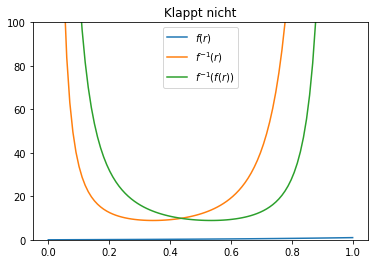

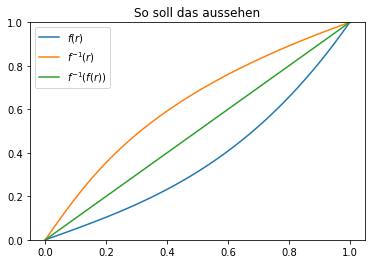

In [23]:
# Lösung von Wolfram Alpha ausprobieren

import numpy as np
import matplotlib.pyplot as plt

# feel the funk
func = lambda x, k: x * (1 - k + k * x**2)
def inverse_func(x, k):
    # Nenner vom ersten und Zähler vom zweiten Bruch sind gleich:
    a = ( (729 * k**2 * x**4 - 108*(x - 1)**3 * x**3)**(1/2) -27 * k * x**2)**(3/2)
    fraction1 = (2**(3/2) * (x - 1)) / a
    fraction2 = a / (3 * (2)**(3/2) * x)
    return -fraction1 - fraction2

r = np.linspace(0, 1, 100)
k = 0.5
f = func(r, k)
f_inv = inverse_func(r, k)
should_be_linear = inverse_func(f,k)

l_f = '$f(r)$'
l_inv = r'$f^{-1}(r)$'
l_lin = r'$f^{-1}(f(r))$'

plt.plot(r, f, label=l_f)
plt.plot(r, f_inv, label=l_inv)
plt.plot(r, should_be_linear, label=l_lin)
plt.figure(1)
plt.plot()
plt.ylim(0,100)
plt.title('Klappt nicht')
plt.legend()
plt.show()

# invertieren mit python-library
from pynverse import inversefunc
inv_func = inversefunc(func, domain = [0,1], args = (k))
f_inv2 = inv_func(r)
should_be_linear = inv_func(f)
plt.figure(2)
plt.plot(r, f, label=l_f)
plt.plot(r, f_inv2, label=l_inv)
plt.plot(r, should_be_linear, label=l_lin)
plt.ylim(0,1)
plt.legend()
plt.title('So soll das aussehen')
plt.show()
